In [1]:
!pip install kora -q
!pip install selenium

     |████████████████████████████████| 57 kB 2.7 MB/s 
     |████████████████████████████████| 1.6 MB 10.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 995 kB 5.3 MB/s 
     |████████████████████████████████| 384 kB 51.1 MB/s 
     |████████████████████████████████| 140 kB 62.1 MB/s 
     |████████████████████████████████| 58 kB 5.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.


In [2]:
from kora.selenium import wd as browser
from selenium.webdriver.common.by import By
import pandas as pd 
import time
from datetime import date,datetime as dt
import datetime
from bs4 import BeautifulSoup
import numpy as np
import re 
from datetime import  timedelta

In [3]:
amazon = []

In [10]:
for i in range(1,100):
  url=f"https://www.amazon.in/Redmi-Note-Green-128GB-Storage/product-reviews/B08696ZMPF/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={i}"
  browser.get(url)
  containers=[x.get_attribute('innerHTML') for x in browser.find_elements(By.XPATH,'//div[@class="a-section celwidget"]')]
  for container in containers:
    dict1=dict()
    bsObj=BeautifulSoup(container)
    #review 
    rev=bsObj.find('span',attrs={"class":"a-size-base review-text review-text-content"}).text.strip()
    #rating
    try:
      rating=bsObj.find('a',attrs={"class":"a-link-normal"})["title"]
      rating=int(float(rating[0]))
    except:
      rating=np.NaN
    

      

    dict1["rating"]=rating
    dict1["review"]=rev

    amazon.append(dict1)


In [11]:
amazon_reviews = pd.DataFrame(amazon)

In [12]:
amazon_reviews

,rating,review
0,4,"It has great screen,battery,build is quite bro..."
1,4,Good
2,4,very nice phone i like it
3,4,This phone is good. I am giving rating after u...
4,4,Overall good piece
...,...,...
1185,3,I like this product.all things are good but I'...
1186,4,Good mobile
1187,3,Hangs always
1188,4,Best phone


In [13]:
amazon_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  1190 non-null   int64 
 1   review  1190 non-null   object
dtypes: int64(1), object(1)
memory usage: 18.7+ KB


In [14]:
amazon_reviews.to_csv(r'Amazon.csv', index= False, header=True)

##WordClouds and EDA

In [15]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Count')

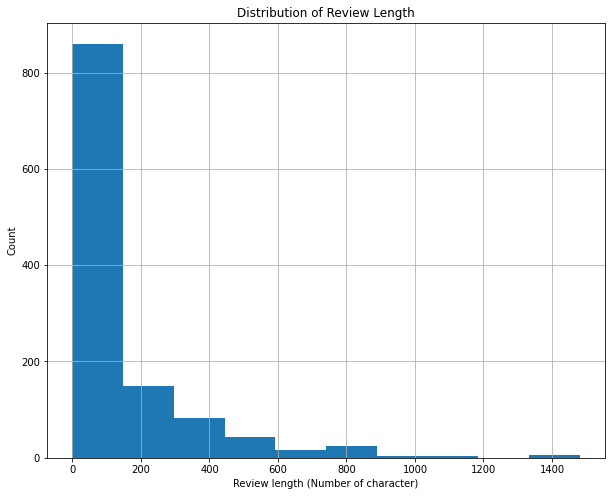

In [16]:
# Plot distribution of review length
review_length = amazon_reviews["review"].dropna().map(lambda x: len(x))
plt.figure(figsize=(10,8))
review_length.loc[review_length < 1500].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length (Number of character)')
plt.ylabel('Count')

In [17]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [18]:
wc = WordCloud(width=1200, height=800, max_words=200, stopwords=STOPWORDS)

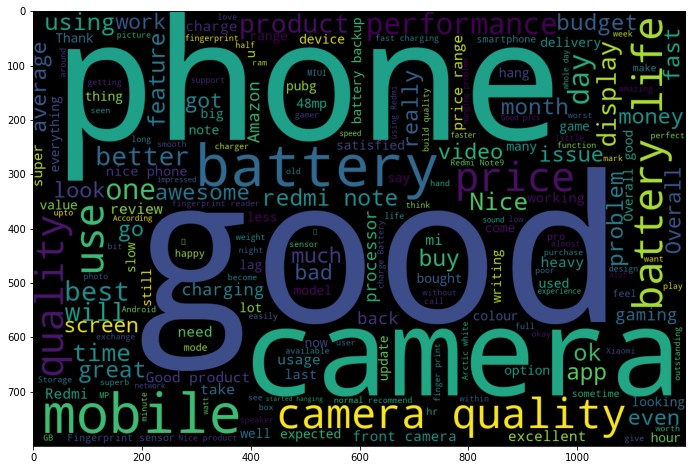

In [19]:
plt.figure(figsize = (12,8))
plt.imshow(wc.generate_from_text(" ".join(amazon_reviews.review)))
plt.show()

In [20]:
tf = CountVectorizer(token_pattern = "[a-z']+", max_df = 0.6, min_df=10, stop_words =STOPWORDS)

In [21]:
tf_mat = tf.fit_transform(amazon_reviews.review)
tf_mat


<1190x326 sparse matrix of type '<class 'numpy.int64'>'
	with 9965 stored elements in Compressed Sparse Row format>

In [22]:
tf.vocabulary_

{'great': 111,
 'screen': 248,
 'battery': 20,
 'build': 32,
 'quite': 229,
 'broad': 30,
 'comparison': 47,
 'brand': 29,
 'quality': 228,
 'good': 108,
 'nice': 184,
 'phone': 202,
 'giving': 105,
 'rating': 232,
 'using': 299,
 'year': 323,
 'durable': 61,
 'life': 143,
 'ok': 189,
 'look': 149,
 'camera': 36,
 'hanging': 116,
 'problem': 219,
 'times': 286,
 'google': 109,
 'support': 273,
 'sound': 263,
 'less': 142,
 'needs': 180,
 'reset': 239,
 'function': 91,
 'work': 316,
 'overall': 197,
 'piece': 208,
 'valuable': 300,
 'product': 221,
 'friend': 86,
 'suggested': 270,
 'buy': 33,
 'redmi': 238,
 'note': 187,
 'tho': 282,
 'nd': 178,
 'impressed': 129,
 'perfomance': 200,
 'seen': 251,
 'one': 192,
 'cousin': 48,
 'outstanding': 196,
 'rough': 241,
 'use': 294,
 'decided': 56,
 'bought': 27,
 'july': 135,
 'first': 83,
 'according': 0,
 'price': 216,
 'arctic': 12,
 'white': 311,
 'gave': 97,
 'decent': 55,
 'vibe': 302,
 'storage': 269,
 'alot': 3,
 'space': 264,
 'fingerp

In [23]:
tf_vocab_reverse = {v:k for k,v in tf.vocabulary_.items()}
tf_vocab_reverse

{111: 'great',
 248: 'screen',
 20: 'battery',
 32: 'build',
 229: 'quite',
 30: 'broad',
 47: 'comparison',
 29: 'brand',
 228: 'quality',
 108: 'good',
 184: 'nice',
 202: 'phone',
 105: 'giving',
 232: 'rating',
 299: 'using',
 323: 'year',
 61: 'durable',
 143: 'life',
 189: 'ok',
 149: 'look',
 36: 'camera',
 116: 'hanging',
 219: 'problem',
 286: 'times',
 109: 'google',
 273: 'support',
 263: 'sound',
 142: 'less',
 180: 'needs',
 239: 'reset',
 91: 'function',
 316: 'work',
 197: 'overall',
 208: 'piece',
 300: 'valuable',
 221: 'product',
 86: 'friend',
 270: 'suggested',
 33: 'buy',
 238: 'redmi',
 187: 'note',
 282: 'tho',
 178: 'nd',
 129: 'impressed',
 200: 'perfomance',
 251: 'seen',
 192: 'one',
 48: 'cousin',
 196: 'outstanding',
 241: 'rough',
 294: 'use',
 56: 'decided',
 27: 'bought',
 135: 'july',
 83: 'first',
 0: 'according',
 216: 'price',
 12: 'arctic',
 311: 'white',
 97: 'gave',
 55: 'decent',
 302: 'vibe',
 269: 'storage',
 3: 'alot',
 264: 'space',
 82: 'fin

#Analyzing using TFIDF

In [24]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import cohen_kappa_score

In [25]:
data_1 = amazon_reviews[~amazon_reviews['review'].isnull()]
data_1.shape

(1190, 2)

In [26]:
data_1.rating.value_counts()

4    905
5    172
3    100
2     11
1      2
Name: rating, dtype: int64

In [58]:
data_2 = data_1.drop('rating', axis = 1)

In [60]:
data_2

,review
0,"It has great screen,battery,build is quite bro..."
1,Good
2,very nice phone i like it
3,This phone is good. I am giving rating after u...
4,Overall good piece
...,...
1185,I like this product.all things are good but I'...
1186,Good mobile
1187,Hangs always
1188,Best phone


In [61]:
train_data = data_2.iloc[:800]
test_data = data_2.iloc[801:]

In [62]:
(train_data.shape, test_data.shape)

((800, 1), (389, 1))

In [78]:
x_train, x_val, y_train, y_val = train_test_split(train_data,train_data,
                                                  test_size=0.4,
                                                  random_state = 123456)

In [79]:
x_train.shape, y_val.shape

((480, 1), (320, 1))

In [80]:
from wordcloud import STOPWORDS

In [81]:
tfidf = TfidfVectorizer(stop_words=STOPWORDS, token_pattern="[a-z']+", 
                        max_df=0.55, min_df=10)

In [82]:
tfidf_mat_train = tfidf.fit_transform(x_train['review'])
tfidf_mat_val = tfidf.transform(x_val['review'])
tfidf_mat_test = tfidf.transform(test_data['review'])

In [83]:
lr_model_1 = LogisticRegression()
lr_model_1.fit(X=tfidf_mat_train, y=y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [84]:
pred_val_lr = lr_model_1.predict(tfidf_mat_val)
cohen_kappa_score(pred_val_lr, y_val)

0.2082619627169917

In [85]:
N =50
svd = TruncatedSVD(n_components=N)
svd_mat_train = svd.fit_transform(tfidf_mat_train)
svd_mat_val = svd.transform(tfidf_mat_val)
svd_mat_test = svd.transform(tfidf_mat_test)

In [86]:
lr_model_2 = LogisticRegression()
lr_model_2.fit(X=svd_mat_train, y=y_train)
pred_val_lr2 = lr_model_2.predict(svd_mat_val)
cohen_kappa_score(pred_val_lr2, y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2085473679994393

##SPACY

In [89]:
import spacy
import pandas as pd
import numpy as np

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [90]:
!python -m spacy download en_core_web_lg

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
2022-09-30 13:32:07.337114: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 8.2 kB/s 
     |████████████████████████████████| 127 kB 5.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.12
    Uninstalling urllib3-1.26.12:
      Successfully uninstalled urllib3-1.26.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.5.0 requires urllib3[socks]~=1.26, but you have urllib3 1.25.11 which is incompatib

In [91]:
nlp = spacy.load('en_core_web_lg')

In [92]:
fp_rev = amazon_reviews.iloc[0,:]["review"]

In [93]:
texts = nlp(fp_rev)

In [94]:
for token in texts[:1000]:
  print(token.text, token.pos_)

It PRON
has VERB
great ADJ
screen NOUN
, PUNCT
battery NOUN
, PUNCT
build VERB
is AUX
quite ADV
broad ADJ
in ADP
comparison NOUN
to ADP
other ADJ
brand NOUN
build VERB
quality NOUN
. PUNCT


In [95]:
list(texts.noun_chunks)[:1000]

[It, great screen, battery, comparison, other brand build quality]

In [96]:
for ent in texts.ents:
  print(ent.text, ent.label_)

In [97]:
#To find dependencies (Dependency Parsing)

for token in texts:
  if token.ent_type_ == 'ORG':
    txt = " ".join([i.text for i in token.subtree])
    if txt !=token.text:
      print(token.text, token.dep_, " ".join([i.text for i in token.subtree]))


In [98]:
from spacy import displacy

In [99]:
sent1 = list(texts.sents)
sent1

[It has great screen,battery,build is quite broad in comparison to other brand build quality.]

In [100]:
displacy.render(sent1, jupyter = True)

##Entity Recognizer

In [101]:
data = amazon_reviews['review'].values.tolist()

str=''
for i in data:
  #print(i)
  str=str+''.join(i)
  str=str.lower()
str

'it has great screen,battery,build is quite broad in comparison to other brand build quality.goodvery nice phone i like itthis phone is good. i am giving rating after using 1 year. phone is durable, battery life is ok. look and camera is also good but there is hanging problem in this. some times google doesn\'t support. sound is very less. it needs to reset when some of function doesn\'t work.overall good piecevaluable product.my friend suggested me to buy redmi note9 tho she was using nd quite impressed by perfomance .nd i\'ve seen my one cousin also using redmi brand.nd that\'s perfomance was just  outstanding after 5year of rough use . so i decided nd bought this one in july2021.first i impressed with look according to price .arctic white gave decent vibe.storage is good it has alot of space. fingerprint sensor is bestest.camera is awesome at the price, have quite mode for good pics , nd it gives best  click for hd pics/ videos  ..once you charge  battery you can use a whole day bac

In [102]:
sent2 = nlp(str)
sent2.user_data["title"] = "Entity Recognizer"
displacy.render(sent2, style="ent", jupyter=True)

##GENSIM

In [103]:
import gensim

In [104]:
amazon_reviews

,rating,review
0,4,"It has great screen,battery,build is quite bro..."
1,4,Good
2,4,very nice phone i like it
3,4,This phone is good. I am giving rating after u...
4,4,Overall good piece
...,...,...
1185,3,I like this product.all things are good but I'...
1186,4,Good mobile
1187,3,Hangs always
1188,4,Best phone


In [105]:
only_reviews = amazon_reviews.review

In [106]:
only_reviews1 = [gensim.utils.any2utf8(rev.lower()) for rev in only_reviews]

In [107]:
only_reviews1 = [gensim.parsing.remove_stopwords(rev) for rev in only_reviews1]

In [108]:
tokens = [list(gensim.utils.tokenize(rev)) for rev in only_reviews1]
tokens

[['great',
  'screen',
  'battery',
  'build',
  'broad',
  'comparison',
  'brand',
  'build',
  'quality'],
 ['good'],
 ['nice', 'phone', 'like'],
 ['phone',
  'good',
  'giving',
  'rating',
  'year',
  'phone',
  'durable',
  'battery',
  'life',
  'ok',
  'look',
  'camera',
  'good',
  'hanging',
  'problem',
  'this',
  'times',
  'google',
  'doesn',
  't',
  'support',
  'sound',
  'less',
  'needs',
  'reset',
  'function',
  'doesn',
  't',
  'work'],
 ['overall', 'good', 'piece'],
 ['valuable', 'product'],
 ['my',
  'friend',
  'suggested',
  'buy',
  'redmi',
  'note',
  'tho',
  'nd',
  'impressed',
  'perfomance',
  'nd',
  'i',
  've',
  'seen',
  'cousin',
  'redmi',
  'brand',
  'nd',
  'that',
  's',
  'perfomance',
  'outstanding',
  'year',
  'rough',
  'use',
  'decided',
  'nd',
  'bought',
  'july',
  'first',
  'impressed',
  'look',
  'according',
  'price',
  'arctic',
  'white',
  'gave',
  'decent',
  'vibe',
  'storage',
  'good',
  'alot',
  'space',
  'f

In [109]:
# Create Dictionary
id2word = gensim.corpora.Dictionary(tokens)

# Create Corpus
texts = tokens

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [110]:
dictionary = gensim.corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [111]:
params={'alpha': 0.1, 'eta': 0.1, 'num_topics': 10,'corpus':corpus,'id2word':id2word}
lda_model = gensim.models.LdaMulticore(random_state=100, chunksize=1500, passes=200,**params)
                                       

In [112]:
from pprint import pprint

In [113]:
# Print the Keyword in the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.064*"good" + 0.063*"product" + 0.034*"camera" + 0.018*"nice" + '
  '0.017*"phone" + 0.016*"quality" + 0.015*"money" + 0.013*"mobile" + '
  '0.012*"value" + 0.010*"video"'),
 (1,
  '0.030*"note" + 0.018*"phone" + 0.017*"good" + 0.015*"redmi" + '
  '0.014*"mobile" + 0.013*"bad" + 0.012*"camera" + 0.012*"tak" + 0.012*"ghun" '
  '+ 0.010*"price"'),
 (2,
  '0.032*"camera" + 0.031*"phone" + 0.020*"battery" + 0.019*"s" + 0.018*"it" + '
  '0.015*"good" + 0.014*"better" + 0.013*"redmi" + 0.012*"i" + 0.011*"t"'),
 (3,
  '0.048*"nd" + 0.027*"good" + 0.023*"price" + 0.021*"redmi" + 0.018*"issue" + '
  '0.018*"use" + 0.018*"best" + 0.016*"pics" + 0.016*"product" + '
  '0.016*"impressed"'),
 (4,
  '0.039*"ह" + 0.036*"क" + 0.025*"र" + 0.016*"म" + 0.015*"ल" + 0.015*"स" + '
  '0.014*"त" + 0.014*"ब" + 0.014*"hai" + 0.013*"छ"'),
 (5,
  '0.045*"phone" + 0.035*"good" + 0.024*"t" + 0.020*"camera" + 0.018*"battery" '
  '+ 0.018*"doesn" + 0.012*"work" + 0.011*"sound" + 0.010*"year" + '
  '0.010*"tim

In [114]:
sent2

it has great screen,battery,build is quite broad in comparison to other brand build quality.goodvery nice phone i like itthis phone is good. i am giving rating after using 1 year. phone is durable, battery life is ok. look and camera is also good but there is hanging problem in this. some times google doesn't support. sound is very less. it needs to reset when some of function doesn't work.overall good piecevaluable product.my friend suggested me to buy redmi note9 tho she was using nd quite impressed by perfomance .nd i've seen my one cousin also using redmi brand.nd that's perfomance was just  outstanding after 5year of rough use . so i decided nd bought this one in july2021.first i impressed with look according to price .arctic white gave decent vibe.storage is good it has alot of space. fingerprint sensor is bestest.camera is awesome at the price, have quite mode for good pics , nd it gives best  click for hd pics/ videos  ..once you charge  battery you can use a whole day backup i

In [115]:
amazon_corpora = [dictionary.doc2bow(t) for t in tokens]

In [116]:
tfidf_amazon = gensim.models.TfidfModel(amazon_corpora)
tfidf_corpus = tfidf_amazon[amazon_corpora]

In [117]:
lsi_model = gensim.models.lsimodel.LsiModel(tfidf_corpus,num_topics= 5, id2word= dictionary)

In [118]:
lsi_model.print_topics(num_topics=5)

[(0,
  '0.977*"good" + 0.160*"product" + 0.068*"phone" + 0.052*"nice" + 0.043*"mobile" + 0.037*"quality" + 0.035*"camera" + 0.026*"battery" + 0.023*"overall" + 0.021*"budget"'),
 (1,
  '-0.782*"nice" + -0.500*"product" + -0.197*"like" + -0.171*"phone" + 0.159*"good" + -0.127*"mobile" + -0.061*"quality" + -0.055*"best" + -0.053*"valuable" + -0.044*"camera"'),
 (2,
  '0.818*"product" + -0.388*"nice" + -0.267*"like" + -0.210*"phone" + -0.148*"mobile" + 0.127*"valuable" + -0.077*"good" + -0.055*"camera" + -0.043*"quality" + -0.041*"budget"'),
 (3,
  '-0.509*"like" + 0.434*"nice" + -0.286*"phone" + -0.220*"best" + -0.189*"camera" + -0.177*"quality" + -0.160*"ok" + -0.139*"it" + -0.137*"battery" + -0.130*"product"'),
 (4,
  '0.747*"like" + -0.342*"mobile" + -0.240*"best" + -0.193*"quality" + -0.153*"camera" + -0.132*"ok" + -0.116*"budget" + -0.108*"price" + -0.108*"battery" + -0.086*"life"')]

In [119]:
review_new_token = gensim.utils.tokenize(str)

In [120]:
review_new_corp = dictionary.doc2bow(review_new_token)

In [121]:
review_new_tfidf = tfidf_amazon[review_new_corp]

In [122]:
lsi_model[review_new_tfidf]

[(0, 0.0745519303202613),
 (1, -0.07241646686153648),
 (2, -0.05082220765465004),
 (3, -0.19643785709734063),
 (4, -0.11104461355907266)]

##K-Means

In [123]:
from sklearn.cluster import k_means
from sklearn.metrics import silhouette_score

In [124]:
lsi_model.projection.s

array([10.51586695,  7.34757121,  6.29697901,  5.22456379,  4.94919921])

In [125]:
tfidf_mat = gensim.matutils.corpus2dense(lsi_model[tfidf_corpus], 
                                         num_terms=len(lsi_model.projection.s))

/usr/local/lib/python3.7/dist-packages/gensim/matutils.py:502: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = np.column_stack(sparse2full(doc, num_terms) for doc in corpus)


In [126]:
(tfidf_mat.T/lsi_model.projection.s).shape

(1190, 5)

In [127]:
V_mat = tfidf_mat.T/lsi_model.projection.s

In [128]:
km = k_means(V_mat,n_clusters=10, n_init=300)

In [129]:
silhouette_score(V_mat, labels=km[1])

0.47239991873836396

##Clustering

In [130]:
for k in range(2,30):
    km = k_means(V_mat,n_clusters=k, n_init=300)
    print(silhouette_score(V_mat, labels=km[1]))

0.55240569192265
0.6090450270768731
0.6536775828208654
0.6981936629459862
0.4248569882074321
0.43575566236167845
0.4424689105771109
0.4551777951455399
0.47239991873836396
0.434744867854635
0.4472841354685536
0.451753871676315
0.4571752289942488
0.4583131702606499
0.46391976908149674
0.4465571962556224
0.426611797215806
0.43254156856222425
0.4341082318608061
0.4370034616945524
0.4431085372815175
0.4424713867565515
0.44859113757002905
0.4538135586946091
0.4557690426184031
0.4298605845190745
0.43282346854355547
0.43588572168742173


In [131]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 4.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2340274 sha256=2a8e3c0746f61a07964f19f9ca09b70e9e66de34dc6d4ff3a06cbaa3a8174626
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan


In [132]:
import hdbscan

In [133]:
hdb = hdbscan.hdbscan(X=V_mat, min_cluster_size=2)

In [134]:
from collections import Counter

In [135]:
Counter(hdb[0])

Counter({87: 13,
         1: 97,
         0: 12,
         42: 12,
         63: 13,
         17: 13,
         56: 12,
         143: 12,
         138: 25,
         2: 31,
         33: 12,
         15: 5,
         104: 3,
         81: 4,
         13: 3,
         27: 6,
         76: 5,
         144: 23,
         38: 6,
         122: 6,
         129: 5,
         141: 2,
         36: 4,
         46: 2,
         25: 5,
         6: 9,
         90: 4,
         89: 2,
         5: 18,
         134: 2,
         59: 3,
         3: 19,
         139: 3,
         4: 12,
         62: 13,
         135: 5,
         49: 3,
         128: 4,
         41: 3,
         115: 6,
         123: 5,
         73: 2,
         142: 6,
         70: 4,
         96: 6,
         -1: 322,
         140: 6,
         127: 12,
         114: 3,
         51: 2,
         44: 6,
         43: 3,
         45: 4,
         11: 6,
         47: 8,
         65: 6,
         50: 2,
         105: 4,
         113: 5,
         68: 6,
         

In [136]:
lda_model = gensim.models.ldamulticore.LdaMulticore(amazon_corpora,num_topics=20, iterations= 100,id2word= dictionary)

In [137]:
lda_model.print_topics(num_topics= 5)

[(5,
  '0.039*"camera" + 0.028*"good" + 0.028*"phone" + 0.022*"battery" + 0.016*"it" + 0.015*"s" + 0.013*"t" + 0.013*"life" + 0.012*"quality" + 0.011*"mp"'),
 (12,
  '0.053*"good" + 0.029*"camera" + 0.020*"battery" + 0.014*"like" + 0.012*"phone" + 0.011*"life" + 0.010*"display" + 0.009*"quality" + 0.009*"redmi" + 0.008*"product"'),
 (10,
  '0.062*"good" + 0.029*"battery" + 0.022*"phone" + 0.016*"camera" + 0.015*"awesome" + 0.012*"quality" + 0.010*"fast" + 0.009*"performance" + 0.009*"product" + 0.009*"charging"'),
 (6,
  '0.043*"nice" + 0.030*"phone" + 0.026*"mobile" + 0.020*"camera" + 0.012*"good" + 0.011*"money" + 0.011*"value" + 0.010*"s" + 0.008*"slow" + 0.008*"price"'),
 (0,
  '0.033*"good" + 0.028*"camera" + 0.027*"battery" + 0.025*"mobile" + 0.021*"phone" + 0.020*"quality" + 0.016*"product" + 0.012*"screen" + 0.012*"build" + 0.012*"excellent"')]

In [138]:
!pip install pyldavis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=1be7f6066f5e2c94b570666e19e87d9c2da78adf6ab3aaa7acf507cfe2864f90
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=5e4af8caca41e72368f01addd1d7b5af4ab90229c9825433d04846b639b9fcde
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyldavis sklearn


In [139]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, amazon_corpora, dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
19    -0.083055 -0.012145       1        1  15.585929
5     -0.051233 -0.063092       2        1   9.987086
8     -0.077319 -0.039124       3        1   9.196897
4     -0.057552  0.002378       4        1   7.544678
0     -0.034078 -0.010131       5        1   5.472934
11    -0.013552  0.157839       6        1   5.113486
2     -0.038198 -0.010846       7        1   5.101933
7     -0.063294  0.009666       8        1   4.736116
16    -0.022179  0.054710       9        1   4.600562
17    -0.038947  0.020483      10        1   4.562945
12     0.034156 -0.035107      11        1   3.774610
14     0.069019 -0.129877      12        1   3.661167
3     -0.031288 -0.018938      13        1   3.509261
10     0.000310 -0.005823      14        1   2.985662
1      0.016389 -0.035846      15        1   2.789226
13    -0.013702  0.052184      16        1   2.749556
18     0.136173 -0.030162      17        1   2.615143
15     0.130623  0.087329      18        1   2.591752
9      0.061969  0.003233      19        1   1.722819
6      0.075757  0.003271      20        1   1.698239, topic_info=        Term        Freq       Total Category  logprob  loglift
8       good  766.000000  766.000000  Default  30.0000  30.0000
10      nice  128.000000  128.000000  Default  29.0000  29.0000
6    quality  220.000000  220.000000  Default  28.0000  28.0000
176       it  163.000000  163.000000  Default  27.0000  27.0000
11     phone  545.000000  545.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
80     redmi    2.037725  142.027303  Topic20  -4.9677  -0.1686
0    battery    2.190441  299.377317  Topic20  -4.8955  -0.8420
6    quality    1.866654  220.512617  Topic20  -5.0554  -0.6962
21      look    1.670402   49.438437  Topic20  -5.1665   0.6879
43      best    1.670402   98.811479  Topic20  -5.1665  -0.0046

[1439 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2138     16  0.631388     aaps
1432     14  0.599465  ability
1696      1  0.184776     able
1696      4  0.184776     able
1696      5  0.554328     able
...     ...       ...      ...
235       6  0.675437        ह
235       9  0.112573        ह
235      10  0.037524        ह
235      16  0.037524        ह
235      18  0.075049        ह

[3446 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[20, 6, 9, 5, 1, 12, 3, 8, 17, 18, 13, 15, 4, 11, 2, 14, 19, 16, 10, 7])